<a href="https://colab.research.google.com/github/wdon021/Comp261_A5/blob/master/COMP421_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
mean = [0, 0, 0]
cov = [[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]]

In [3]:
# https://en.wikipedia.org/wiki/N-sphere uni

In [4]:
# generating random point for unit sphere # normalizd it by euclidean distance 
# Multiply each number by 1/√ (x^2+y^2+z^2) (a.k.a. Normalise) . You should handle what happens if x=y=z=0.
# Multiply each number by the radius of your sphere.

In [5]:
def unit_sphere(data):
  return np.array([[coord / math.sqrt(sum(coords * coords for coords in line)) for coord in line] for line in data])

In [6]:
united = np.random.multivariate_normal(mean, cov,10000)

In [7]:
x11, x22, x33 = united.T

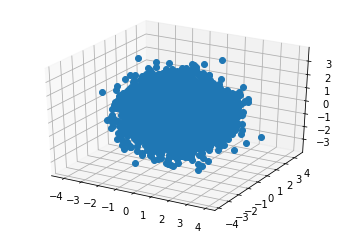

In [8]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(x11, x22, x33, 'o')

In [9]:
united_y = unit_sphere(united)

### Training test validation split


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(united, united_y, test_size = 0.2)

In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25)

In [12]:
x111, x112, x113 = Y_train.T

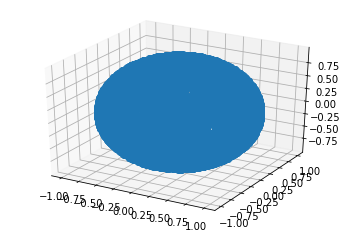

In [13]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(x111, x112, x113, 'o')

## Build Model

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow import keras

In [23]:
import keras.backend as kb

In [26]:
import tensorflow as tf

In [19]:
model = Sequential()
model.add(Dense(3, input_dim = 3, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='linear'))

In [22]:
# Instantiate an optimizer
optimizer = keras.optimizers.Adam(learning_rate = 0.01)

In [24]:
# create an loss function
def Keras_loss_function(y_actual, y_predicted):
  mse = kb.mean(kb.sum(kb.square(y_actual - y_predicted))) # (1/n*(sum(sqr(Y-Y_hat))))
  return mse

In [25]:
# training dataset
batch_size = 100

In [27]:
# creates a dataset with a separate element fro each row of the input tensor
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))

In [ ]:
# create a loss function

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 33        
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# should use grid search

In [ ]:
model.fit(x= X_train, y=Y_train, min_batch, epochs=100, validation_data=[X_val, Y_val] )

Train on 6000 samples, validate on 2000 samples
Epoch 1/100
6000/6000 [==============================] - 0s 47us/step - loss: 0.0056 - accuracy: 0.9623 - val_loss: 0.0066 - val_accuracy: 0.9480
Epoch 2/100
6000/6000 [==============================] - 0s 46us/step - loss: 0.0055 - accuracy: 0.9603 - val_loss: 0.0064 - val_accuracy: 0.9535
Epoch 3/100
6000/6000 [==============================] - 0s 47us/step - loss: 0.0055 - accuracy: 0.9617 - val_loss: 0.0063 - val_accuracy: 0.9490
Epoch 4/100
6000/6000 [==============================] - 0s 42us/step - loss: 0.0054 - accuracy: 0.9618 - val_loss: 0.0062 - val_accuracy: 0.9530
Epoch 5/100
6000/6000 [==============================] - 0s 43us/step - loss: 0.0054 - accuracy: 0.9620 - val_loss: 0.0062 - val_accuracy: 0.9495
Epoch 6/100
6000/6000 [==============================] - 0s 46us/step - loss: 0.0053 - accuracy: 0.9615 - val_loss: 0.0062 - val_accuracy: 0.9495
Epoch 7/100
6000/6000 [==============================] - 0s 41us/step - loss

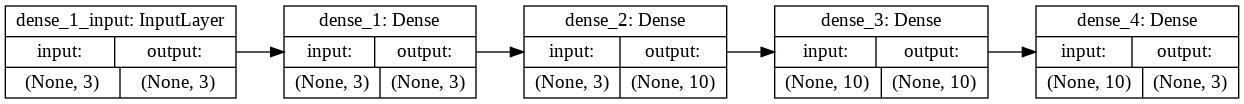

In [ ]:
keras.utils.plot_model(model, show_shapes = True, rankdir = 'LR')

In [ ]:
predictions = model.predict(Y_test)

In [ ]:
Y_test

array([[ 0.08940418, -0.34334145, -0.93494574],
       [-0.44994791, -0.45556064,  0.76812198],
       [-0.52264345, -0.81231402,  0.25882381],
       ...,
       [ 0.11987921,  0.96969506, -0.21288604],
       [-0.2818091 , -0.17242431, -0.94385035],
       [ 0.4943025 ,  0.36654576,  0.78823172]])

In [ ]:
f1, f2, f3 = predictions.T

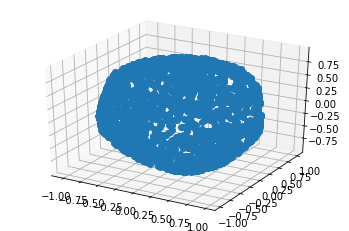

In [ ]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(f1, f2, f3, 'o')

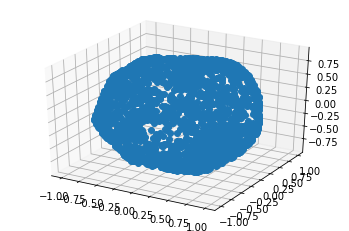

In [ ]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(f1, f2, f3, 'o')